# 🧠 K-Means Clustering

## Definition
K-Means is an **unsupervised machine learning algorithm** used to group data points into a predefined number of clusters (**K**) based on their similarity.  
The algorithm partitions the dataset so that points within a cluster are more similar to each other than to points in other clusters.

---

## How It Works
K-Means works by iteratively assigning data points to the nearest cluster center (centroid) and then recalculating the centroids based on the mean of assigned points until convergence.

### **Algorithm Steps**
1. Choose the number of clusters, **K**.  
2. Initialize **K centroids** randomly.  
3. Assign each data point to the **nearest centroid**.  
4. Update centroids by computing the **mean of all points** in each cluster.  
5. Repeat steps 3–4 until centroids no longer change (or until a maximum number of iterations).

---

## Uses of K-Means
- Customer segmentation in marketing  
- Image compression and color quantization  
- Document or text clustering  
- Pattern recognition and anomaly detection  

---

*In short, K-Means helps uncover hidden patterns or natural groupings in unlabeled data.*


## 📊 Dataset Description

For implementing our **K-Means Clustering** algorithm, we will create a **synthetic dataset** using the `make_blobs` function from `sklearn.datasets`.

### **Dataset Features:**
- The dataset will contain **3 features (X1, X2, X3)** — representing a 3-dimensional space.  
- The data will be divided into **3 clusters**, each representing a distinct group of points.  
- Each cluster will be visualized in **different colors**:
  - 🟢 Green  
  - 🔵 Blue  
  - 🔴 Red  

This will help us clearly observe how K-Means groups the data points based on their proximity to cluster centers.


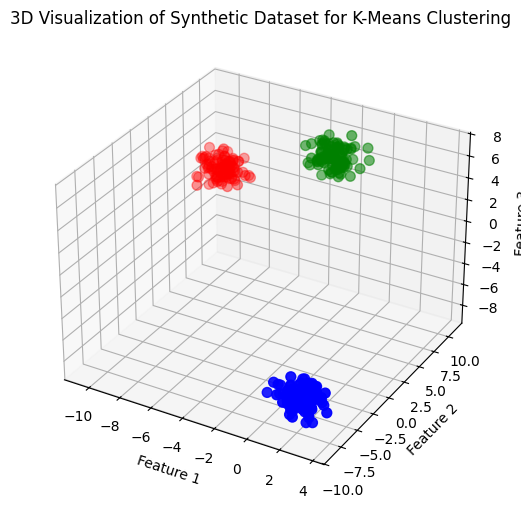

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

# Create synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=3, n_features=3, cluster_std=0.7, random_state=42)
colors = np.array(['green', 'blue', 'red'])

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors[y_true], s=50)

ax.set_title('3D Visualization of Synthetic Dataset for K-Means Clustering', fontsize=12)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()


## Step 1: Centroid Initialization

## Step 1 — Centroid Initialization

**Goal:** Initialize K centroids in the feature space before starting the iterative assignment/update loop.

**Why:** K-Means needs starting centroid positions. Good initialization helps faster convergence and better final clustering.  
**Method used here:** Randomly select `K` distinct data points from the dataset as initial centroids (simple and commonly used).  
**What this cell does:**  
1. If `X` (our dataset) is not already defined, it recreates the synthetic 3-feature dataset.  
2. Sets `K = 3`.  
3. Randomly selects `K` samples from `X` as initial centroids (deterministic with `random_state`).  
4. Prints the centroid coordinates and shows a 3D scatter plot with centroids plotted as larger black stars so you can visually confirm the initialization.


Initial centroids (K = 3):
Centroid 0: [ 2.11584559 -6.48825075 -6.26933048]
Centroid 1: [-9.25757483  7.71228669  1.58629089]
Centroid 2: [-2.53694292  8.64002221  3.38793128]


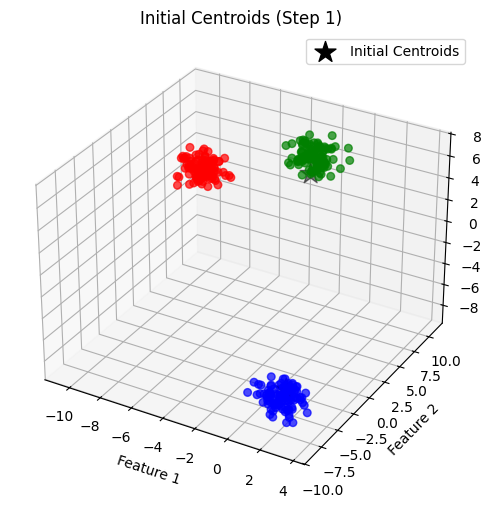

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

try:
    X
except NameError:
    from sklearn.datasets import make_blobs
    X, y_true = make_blobs(n_samples=300, centers=3, n_features=3, cluster_std=0.7, random_state=42)

K = 3 # here we have to select the k value (no of centroid by our knowledge)
random_state = 42
rng = np.random.RandomState(random_state)

initial_idx = rng.choice(X.shape[0], size=K, replace=False)
centroids = X[initial_idx].astype(float)

print("Initial centroids (K = {}):".format(K))
for i, c in enumerate(centroids):
    print(f"Centroid {i}: {c}")

colors = np.array(['green', 'blue', 'red'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# plot points (if true labels available use them, otherwise plot all as gray)
try:
    ax.scatter(X[:,0], X[:,1], X[:,2], c=colors[y_true], s=30, alpha=0.7)
except Exception:
    ax.scatter(X[:,0], X[:,1], X[:,2], c='lightgray', s=30, alpha=0.7)

ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], marker='*', s=250, c='k', label='Initial Centroids')

ax.set_title('Initial Centroids (Step 1)')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()
plt.show()


In [4]:

import numpy as np
from sklearn.datasets import make_blobs
import plotly.graph_objects as go

try:
    X
except NameError:
    X, y_true = make_blobs(n_samples=300, centers=3, n_features=3, cluster_std=0.7, random_state=42)

# Set number of clusters
K = 3
random_state = 42
rng = np.random.RandomState(random_state)

# Initialize centroids by randomly picking K unique points from X
initial_idx = rng.choice(X.shape[0], size=K, replace=False)
centroids = X[initial_idx].astype(float)

print("Initial centroids (K = {}):".format(K))
for i, c in enumerate(centroids):
    print(f"Centroid {i}: {c}")

colors = ['green', 'blue', 'red']

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=X[:, 0], y=X[:, 1], z=X[:, 2],
    mode='markers',
    marker=dict(size=5, color=[colors[i] for i in y_true], opacity=0.7),
    name='Data Points'
))

fig.add_trace(go.Scatter3d(
    x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 2],
    mode='markers',
    marker=dict(size=3, color='black', symbol='x'),
    name='Initial Centroids'
))

fig.update_layout(
    title='Interactive 3D Visualization of Initial Centroids',
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Feature 3'
    ),
    width=800,
    height=600,
    showlegend=True
)

fig.show()


Initial centroids (K = 3):
Centroid 0: [ 2.11584559 -6.48825075 -6.26933048]
Centroid 1: [-9.25757483  7.71228669  1.58629089]
Centroid 2: [-2.53694292  8.64002221  3.38793128]


## Step 2: Assign each data point to the nearest centroid.

## Step 2 — Assign Each Data Point to the Nearest Centroid

**Goal:**  
To group each data point into the cluster whose centroid is **closest** to it in terms of Euclidean distance.



**Process:**
1. For each data point, compute its distance to every centroid.  
2. Assign it to the cluster with the smallest distance.  
3. Visualize the new cluster assignments with different colors.

We’ll also show centroids (⚫ black crosses) to observe which cluster each data point currently belongs to.


In [6]:

import numpy as np
import plotly.graph_objects as go

try:
    centroids
except NameError:
    print("Please run Step 1 first to initialize centroids.")
    raise

# Function to compute Euclidean distance between points and centroids
def compute_distances(X, centroids):
    # Shape: (num_samples, K)
    distances = np.zeros((X.shape[0], len(centroids)))
    for i, c in enumerate(centroids):
        distances[:, i] = np.linalg.norm(X - c, axis=1)
    return distances

# Function to assign clusters
def assign_clusters(X, centroids):
    distances = compute_distances(X, centroids)
    return np.argmin(distances, axis=1)

# Assign each data point to the nearest centroid
labels = assign_clusters(X, centroids)

# Define colors for current cluster assignments
cluster_colors = ['green', 'blue', 'red']

fig = go.Figure()

for i in range(len(centroids)):
    cluster_points = X[labels == i]
    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 0],
        y=cluster_points[:, 1],
        z=cluster_points[:, 2],
        mode='markers',
        marker=dict(size=5, color=cluster_colors[i], opacity=0.7),
        name=f'Cluster {i}'
    ))

fig.add_trace(go.Scatter3d(
    x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 2],
    mode='markers',
    marker=dict(size=3, color='black', symbol='x'),
    name='Centroids'
))

fig.update_layout(
    title='Step 2: Cluster Assignment (Interactive 3D Visualization)',
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Feature 3'
    ),
    width=800,
    height=600,
    showlegend=True
)

fig.show()


## Step 3: Update centroids

In [8]:

import numpy as np
import plotly.graph_objects as go

try:
    labels
except NameError:
    print("Please run Step 2 first to assign clusters.")
    raise

def update_centroids(X, labels, K):
    new_centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        points = X[labels == i]
        if len(points) > 0:
            new_centroids[i] = points.mean(axis=0)
        else:
            # Handle empty cluster (reinitialize randomly)
            new_centroids[i] = X[np.random.randint(0, X.shape[0])]
    return new_centroids

# Update centroids
new_centroids = update_centroids(X, labels, K)

print("Old centroids:\n", centroids)
print("\nUpdated centroids:\n", new_centroids)

fig = go.Figure()

cluster_colors = ['green', 'blue', 'red']
for i in range(K):
    cluster_points = X[labels == i]
    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 0],
        y=cluster_points[:, 1],
        z=cluster_points[:, 2],
        mode='markers',
        marker=dict(size=5, color=cluster_colors[i], opacity=0.7),
        name=f'Cluster {i}'
    ))

fig.add_trace(go.Scatter3d(
    x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 2],
    mode='markers',
    marker=dict(size=10, color='gray', symbol='x'),
    name='Old Centroids'
))

fig.add_trace(go.Scatter3d(
    x=new_centroids[:, 0], y=new_centroids[:, 1], z=new_centroids[:, 2],
    mode='markers',
    marker=dict(size=10, color='black', symbol='x'),
    name='Updated Centroids'
))

fig.update_layout(
    title='Step 3: Updated Centroids (Interactive 3D Visualization)',
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Feature 3'
    ),
    width=800,
    height=600,
    showlegend=True
)

fig.show()

# Update global centroids for next iteration
centroids = new_centroids.copy()


Old centroids:
 [[ 1.96671168 -6.83850146 -6.86113463]
 [-8.9309812   7.24004692  2.07091032]
 [-2.52323684  9.12138882  4.72385209]]

Updated centroids:
 [[ 1.96671168 -6.83850146 -6.86113463]
 [-8.9309812   7.24004692  2.07091032]
 [-2.52323684  9.12138882  4.72385209]]


## step 4 (Repeat Until Convergence)


In [10]:

import numpy as np
import plotly.graph_objects as go

def compute_distances(X, centroids):
    distances = np.zeros((X.shape[0], len(centroids)))
    for i, c in enumerate(centroids):
        distances[:, i] = np.linalg.norm(X - c, axis=1)
    return distances

def assign_clusters(X, centroids):
    distances = compute_distances(X, centroids)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, K):
    new_centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        points = X[labels == i]
        if len(points) > 0:
            new_centroids[i] = points.mean(axis=0)
        else:
            # handle empty cluster
            new_centroids[i] = X[np.random.randint(0, X.shape[0])]
    return new_centroids

# K-Means loop
max_iters = 100
tolerance = 1e-4
for iteration in range(max_iters):
    old_centroids = centroids.copy()

    # Step 2: Assign clusters
    labels = assign_clusters(X, centroids)

    # Step 3: Update centroids
    centroids = update_centroids(X, labels, K)

    # Compute centroid shift
    shift = np.linalg.norm(centroids - old_centroids)

    print(f"Iteration {iteration+1}: centroid shift = {shift:.6f}")

    if shift < tolerance:
        print("\n✅ Convergence reached!")
        break
else:
    print("\n⚠️ Maximum iterations reached without full convergence.")

cluster_colors = ['green', 'blue', 'red']
fig = go.Figure()

# Plot final clusters
for i in range(K):
    cluster_points = X[labels == i]
    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 0],
        y=cluster_points[:, 1],
        z=cluster_points[:, 2],
        mode='markers',
        marker=dict(size=5, color=cluster_colors[i], opacity=0.7),
        name=f'Cluster {i}'
    ))

# Plot final centroids
fig.add_trace(go.Scatter3d(
    x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 2],
    mode='markers',
    marker=dict(size=5, color='black', symbol='x'),
    name='Final Centroids'
))

fig.update_layout(
    title='Step 4: Final K-Means Clusters After Convergence',
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Feature 3'
    ),
    width=800,
    height=600,
    showlegend=True
)

fig.show()


Iteration 1: centroid shift = 0.000000

✅ Convergence reached!


# 🏁 Final Summary — Complete K-Means Clustering Pipeline

## Overview
We have successfully implemented the **K-Means Clustering Algorithm from scratch**, following all major steps — from dataset creation to convergence.  
Below is a concise summary of each step and the overall workflow.

---

## Step 1 — Centroid Initialization
- **Goal:** Select initial positions for K cluster centers.  
- **Method Used:** Randomly select K unique points from the dataset.  
- **Output:** Initial centroids plotted as black crosses on the 3D scatter plot.  
- **Formula Used:** None (simple random selection).  

---

## Step 2 — Assign Each Data Point to the Nearest Centroid
- **Goal:** Group each data point into the cluster with the nearest centroid.  
- **Formula Used:** Euclidean Distance Formula (`distance between x_j and μ_i`).  
- **Process:**  
  - Compute distance of every point to every centroid.  
  - Assign the point to the cluster with the smallest distance.  
- **Output:** Each point labeled with its nearest cluster color (green, blue, or red).

---

## Step 3 — Update Centroids
- **Goal:** Recalculate the position of each centroid.  
- **Formula Used:** Centroid Mean Formula (`μ_i = average of all points in cluster i`).  
- **Process:**  
  - For each cluster, calculate the mean of all its points.  
  - Move the centroid to this new position.  
- **Output:** Updated centroids shown as new black crosses on the 3D scatter plot.

---

## Step 4 — Repeat Until Convergence
- **Goal:** Repeat the assign–update cycle until centroids stabilize.  
- **Formula Used:** Convergence Check (`difference between old and new centroids < tolerance`).  
- **Process:**  
  - Continue updating until the centroid shift is below a small threshold or max iterations are reached.  
- **Output:**  
  - Final stable clusters with minimal movement between iterations.  
  - Final centroids positioned at the true cluster centers.

---

## ✅ Key Takeaways
- **K-Means is unsupervised:** It discovers patterns in unlabeled data.  
- **Relies on distance:** Uses Euclidean distance to measure similarity.  
- **Converges quickly:** Reaches a stable configuration after a few iterations.  
- **Scalable:** Works efficiently for large datasets but can get stuck in local minima depending on initialization.  

---

## 🔍 Optional Enhancements
To make it more robust, you can try:
- **K-Means++ Initialization:** Smarter centroid selection to improve convergence.  
- **Elbow Method:** To find the optimal number of clusters (K).  
- **Standardization:** Scaling features before clustering for better results.

---

